# ASSIGNMENT - 2020AIML081 - DATASET: CORONA_NLP_TRAIN

#### 1. Import required libraries

In [1]:
import nltk
import warnings
import re
import string

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

#### 2. Read dataset and perfom Text processing for the tweets 

In [2]:
df = pd.read_csv('Corona_NLP_train.csv')

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [4]:
df_work = df[['OriginalTweet','Sentiment']]

In [5]:
df_work.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [6]:
for i in range(0,df_work.shape[0]):
    df_work['OriginalTweet'][i] = re.sub(r"http\S+", "", df_work['OriginalTweet'][i])
    df_work['OriginalTweet'][i] = ' '.join([word for word in df_work['OriginalTweet'][i].split() if word not in stopwords])
    df_work['OriginalTweet'][i] = ' '.join(e for e in df_work['OriginalTweet'][i].split() if (e.isalnum() or e.isspace()))
    df_work['OriginalTweet'][i] = ' '.join([c for c in df_work['OriginalTweet'][i].split() if c not in string.punctuation])
    df_work['OriginalTweet'][i] = df_work['OriginalTweet'][i].lower()

In [7]:
df_work.head()

,OriginalTweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order,Positive
2,coronavirus woolworths give disabled dedicated shopping hours amid outbreak,Positive
3,my food stock one there will be enough food for everyone take stay stay,Positive
4,ready go supermarket not food stock litteraly the serious it causes,Extremely Negative


#### 3. Using the train_test_split function of Sklearn, Split train and test dataset

In [8]:
X = df_work['OriginalTweet']
y = df_work['Sentiment']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

 #### 4. Create pipeline and define parameters for GridSearch

In [10]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [11]:
grid_search = GridSearchCV(text_clf, tuned_parameters, cv = 5)

#### 5. Perform classification (using GridSearch)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [1, 0.1, 0.01],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False),
                         'vect__ngram_range': [(1, 1), (1, 2), (2, 2)]})

In [13]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_tfidf__norm,param_tfidf__use_idf,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.930593,0.085563,0.177254,0.033908,1,l1,True,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}",0.306491,0.305970,0.308053,0.304582,0.305155,0.306050,0.001197,31
1,2.743718,0.169566,0.377002,0.032555,1,l1,True,"(1, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}",0.287227,0.285491,0.289309,0.287053,0.286061,0.287028,0.001307,36
2,2.197279,0.091568,0.281984,0.031351,1,l1,True,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.299028,0.296425,0.300417,0.297640,0.299427,0.298587,0.001401,34
3,0.918516,0.079547,0.172443,0.011828,1,l1,False,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}",0.304061,0.306144,0.309094,0.301978,0.304114,0.305078,0.002401,32
4,2.814856,0.247165,0.373235,0.039351,1,l1,False,"(1, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}",0.289830,0.288789,0.293301,0.290698,0.290401,0.290604,0.001498,35
5,2.369054,0.144234,0.313412,0.025873,1,l1,False,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l1', 'tfidf__use_idf': False, 'vect__ngram_range': (2, 2)}",0.301631,0.302326,0.302326,0.299028,0.302204,0.301503,0.001264,33
6,1.018794,0.068696,0.207224,0.029439,1,l2,True,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}",0.380597,0.385804,0.384589,0.380597,0.385697,0.383457,0.002373,11
7,2.697193,0.038702,0.343269,0.045520,1,l2,True,"(1, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}",0.363763,0.366713,0.363242,0.358903,0.363652,0.363255,0.002502,21
8,2.397082,0.116248,0.329368,0.032451,1,l2,True,"(2, 2)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': True, 'vect__ngram_range': (2, 2)}",0.364977,0.355606,0.362721,0.351440,0.352543,0.357458,0.005441,23
9,0.980577,0.081494,0.199841,0.006366,1,l2,False,"(1, 1)","{'clf__alpha': 1, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}",0.374523,0.369143,0.376432,0.370531,0.374761,0.373078,0.002762,14


In [14]:
grid_search.best_params_

{'clf__alpha': 0.1,
 'tfidf__norm': 'l2',
 'tfidf__use_idf': False,
 'vect__ngram_range': (1, 1)}

In [15]:
y_pred = grid_search.predict(X_test)

#### 6. Print the confusion matrix, accuracy, F1 score on the test dataset

In [16]:
pd.reset_option('display.max_colwidth')

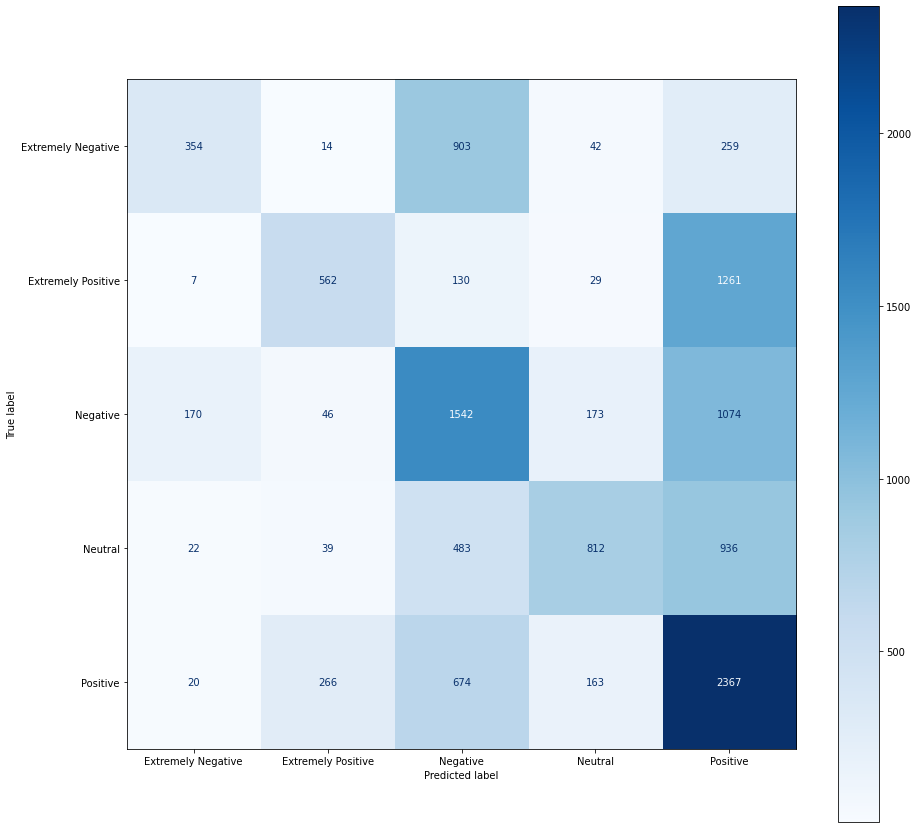

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.grid(False)
plot_confusion_matrix(grid_search,X_test, y_test, ax = ax,  cmap=plt.cm.Blues);

In [18]:
print('Accuracy on the test dataset: ',accuracy_score(y_test, y_pred))

Accuracy on the test dataset:  0.456511175898931


In [19]:
print('F1_score on the test dataset: ', f1_score(y_test,y_pred, average = 'micro'))

F1_score on the test dataset:  0.456511175898931


In [20]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.62      0.23      0.33      1572
Extremely Positive       0.61      0.28      0.39      1989
          Negative       0.41      0.51      0.46      3005
           Neutral       0.67      0.35      0.46      2292
          Positive       0.40      0.68      0.50      3490

          accuracy                           0.46     12348
         macro avg       0.54      0.41      0.43     12348
      weighted avg       0.51      0.46      0.44     12348

